In [2]:
%run /Users/amalcolm/Dropbox/Nonlinear/Experiments/CODE/LABCodes/ComputeDelays.py  #load a whole bunch of (poorly commented) subroutines
#%matplotlib auto
%matplotlib inline
from matplotlib.lines import Line2D

If you uncomment the code in the cell below i twill do the calculation of. he dalaytimes. It's the delaystep parameter that was not set correclty in Somayeh's case.

In [34]:
#GetDelays(['/Users/amalcolm/Dropbox/Nonlinear/Experiments/CODE/LABCodes/Somayeh/9.0_10.0V_0s_Jun_09_2021_11_00_07_AM/'],
#          [1.0],winlen=60e-6,savefig=0,pathbase='',compbase='',recompute=1,missing_data=np.array([]),
#          delaystep=0.25,delay_scale_fact=1,doslopes=0,plotcolor='O')   #'9.0_10.0V_0s_Jun_09_2021_05_22_39_PM/'


This cell just shows you how to read the pump signals, you have to add the path to get to the dataset for it to actually work.

In [44]:
pumpdat=timedata('pumpdat')
readlabdat('STrans_B4.csv',pumpdat)
  

FileNotFoundError: [Errno 2] No such file or directory: 'STrans_B4.csv'

This just plots the data

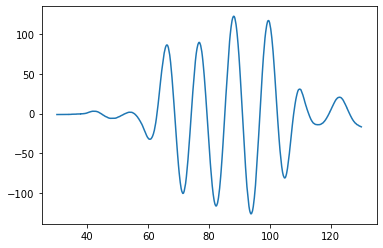

In [24]:
plt.plot(pumpdat.time*10**6,pumpdat.data)

This loads a probe dataset and then the following cell plots it

In [37]:
probedat=timedata('probedat')
readlabdat('9.0_0.4V_0s_May_19_2021_01_04_37_PM/pr46.25.csv',probedat)
#probedat2=timedata('probedat2')
#readlabdat('9.0_0.4V_0s_May_14_2021_04_36_36_PM/pr86.75.csv',probedat2)
probedat3=timedata('probedat3')
readlabdat('/Users/amalcolm/Dropbox/PDF_Results/SKT2_PDF/9.0_0.4V_0s_Apr_22_2021_09_00_15_AM/pr46.5.csv',probedat3)
  

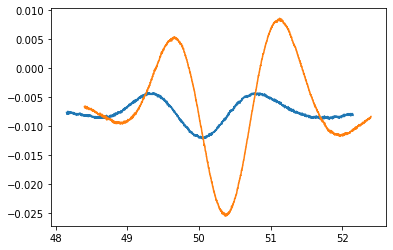

In [38]:
plt.plot(probedat.time*1e6,probedat.data)
#plt.plot(probedat2.time*1e6,probedat2.data)
plt.plot(probedat3.time*1e6,probedat3.data)

In [26]:
pwd()

'/Users/amalcolm/Dropbox/Nonlinear/Experiments/CODE/LABCodes/Somayeh'

This loads the pump signals and then filters it at different frequencies, I think this was when I was looking to see if we saw those higher harmonics in our recorded pump signals. I also extract the amplitude so that I get the resonance plot below.

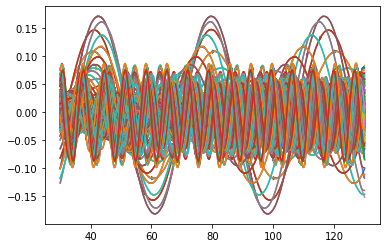

In [61]:
dirname='AllPUMPFreqsMay_22_2021_09_05_38_AM/'

freqs=np.arange(10000,147000,1000)
pumpdat=timedata('pumpdat')
amp=np.zeros(np.shape(freqs))

ii=0
for freq in freqs:
    fname=dirname+'STrans'+str(freq)+'.csv'
    readlabdat(fname,pumpdat,nch=2)
    #print(np.shape(pumpdat.data))
    plt.plot(pumpdat.time*1e6,pumpdat.data[:,0])
    dat2= butter_lowpass_filter(pumpdat.data[:,0],500000.,1./(pumpdat.time[2]-pumpdat.time[1]))
    plt.plot(pumpdat.time*1e6,dat2)
    amp[ii]=np.max(dat2)
    ii=ii+1
    
#plt.xlim([40,60])
  

In [62]:
print(1/(100e-6))

10000.0


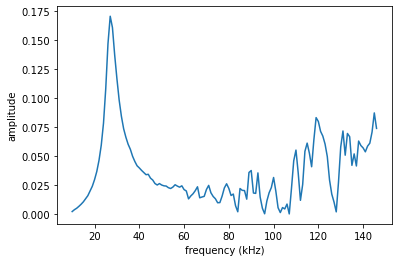

In [63]:
plt.figure()
plt.plot(freqs/1e3,amp)
plt.xlabel('frequency (kHz)')
plt.ylabel('amplitude')
plt.savefig('Resonance.png')

Looks at different pump amplitudes

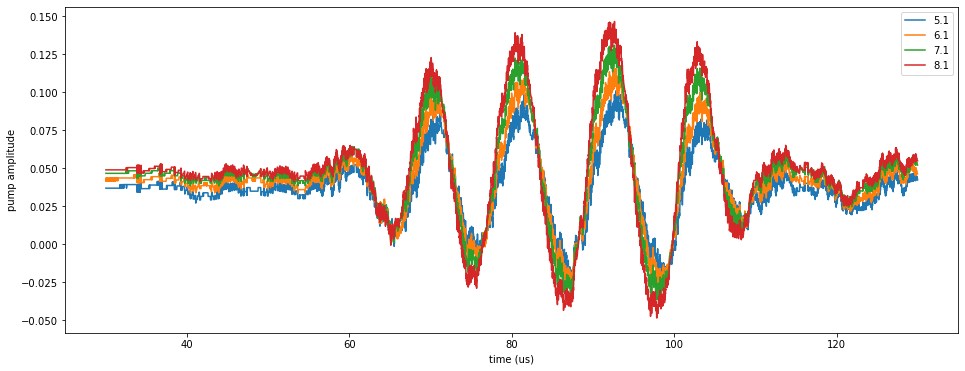

In [59]:
dirname='AllPUMPAmpsMay_22_2021_08_54_22_AM/'

#amps=[0.1,.6,5.1,5.6,6.1,6.6,7.1,7.6,8.1,8.6]#np.arange(5.1,9.1,.5)]
amps=np.arange(5.1,9.1,1.0)

pumpdat0=timedata('pumpdat0')
pumpdat=timedata('pumpdat')

plt.figure(figsize=[16,6])
ii=0
fname=dirname+'STrans0.1.csv'
readlabdat(fname,pumpdat0,nch=2)
scal0=np.max(pumpdat0.data[:,1])
#plt.plot(pumpdat0.time*1e6,pumpdat0.data[:,1],label='0.1')
for amp in amps:
    fname=dirname+'STrans'+str(amp)+'.csv'
    readlabdat(fname,pumpdat,nch=2)
    datscal=np.max(pumpdat.data[:,1])
    scaldat=np.copy(pumpdat.data[:,1])*scal0/datscal
    datdiff=scaldat-pumpdat0.data[:,1]
    #print(np.shape(pumpdat.data))
    datfilt=butter_lowpass_filter(datdiff,150000.,1./(pumpdat.time[2]-pumpdat.time[1]))
    plt.plot(pumpdat.time*1e6,datdiff,label=amp)
    ii=ii+1
plt.legend()
plt.xlabel('time (us)')
plt.ylabel('pump amplitude')
plt.savefig('Datdiff.png')

The next few cells look at different datasets and compare the dataset its fft etc.  There are some special cases that are treated in the 'ifs'

9.0_10.0V_0s_Jun_17_2021_02_14_51_PM/
(280, 5)
9.0_10.0V_0s_Jun_17_2021_11_42_49_AM/
(70, 5)


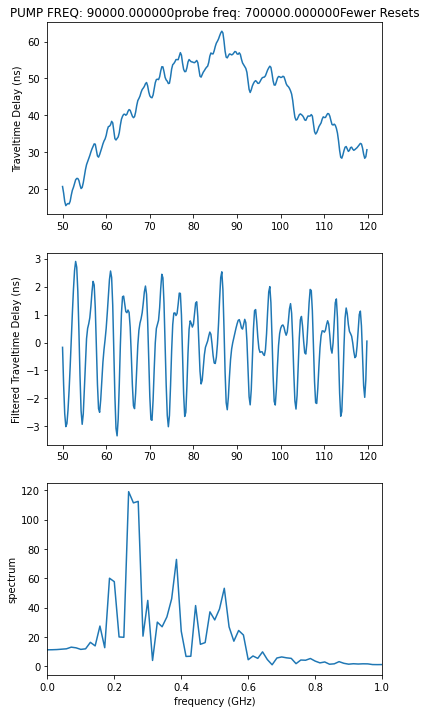

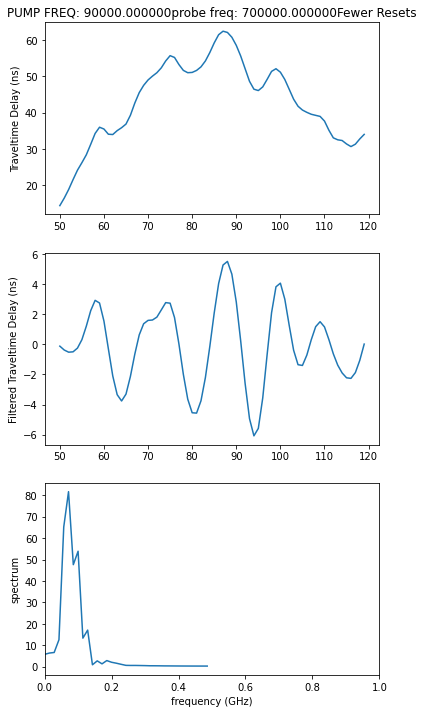

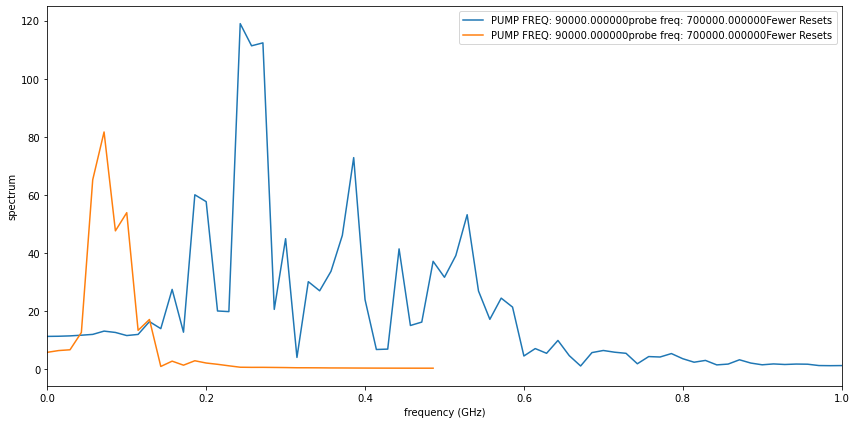

In [99]:
#9.0_0.4V_0s_May_19_2021_02_16_30_PM
dirnamelist=[#'9.0_0.4V_0s_May_21_2021_12_39_41_PM/', #other transducers
             #'9.0_10.0V_0s_May_26_2021_08_56_39_AM/', #other amp/scope/fn gen/cables
    #'9.0_0.4V_0s_May_21_2021_10_02_25_PM/', #pump at resonance
 #            '9.0_0.4V_0s_May_19_2021_02_16_30_PM/',  #standard setup
   #          '9.0_0.4V_0s_May_20_2021_10_59_31_AM/',  #transducer resonances
   #         '9.0_0.4V_0s_May_21_2021_05_32_41_PM/',  #Pump 95 kHz
             #'9.0_0.4V_0s_May_20_2021_09_44_09_PM/', #probe 750 kHz
             #'9.0_0.4V_0s_May_20_2021_04_22_23_PM/', #probe 650 kHz
   #          '9.0_0.4V_0s_May_21_2021_08_11_39_AM/',  #Pump 85 kHz
#             '4.5_10.0V_0s_May_28_2021_10_23_15_AM/'  #Pump at 4.5 V and 30 kHz
#                '9.0_10.0V_0s_Jun_09_2021_03_29_30_PM/', # .25 us sampling
#                '9.0_10.0V_0s_Jun_09_2021_11_00_07_AM/', # 1 us sampling
#                '9.0_10.0V_0s_Jun_09_2021_05_22_39_PM/' # .25 us sampling
                '9.0_10.0V_0s_Jun_17_2021_02_14_51_PM/', # turned off oscilloscope resets, .25 us
                '9.0_10.0V_0s_Jun_17_2021_11_42_49_AM/' #turned off oscilloscope resets, 1 us
   #          '/Users/amalcolm/Dropbox/PDF_Results/SKT2_PDF/9.0_0.4V_0s_Apr_22_2021_09_00_15_AM/'
            ]
printfigs=True
indfigs=True
summaryfig=plt.figure(figsize=[12,6])
for dirname in dirnamelist:
    if dirname[0] == '/':
        dat=np.genfromtxt(dirname+'Delays_Alison.txt')
    else:
        dat=np.genfromtxt(dirname+'Delays.txt')
    
    print(dirname)
    print(np.shape(dat))
    tshifts=shifts('tshifts')
    tshifts.raw=dat[:,1]
    tshifts.remove_noise=dat[:,2]
    tshifts.remove_noise_trend=dat[:,3]
    tshifts.remove_noise_wiggles=dat[:,4]
    tshifts.delays=dat[:,0]
    Rfile=open(dirname+'README','r')
    title=Rfile.read()
#    title=np.loadtxt(dirname+'README')
 #   print(title)

    dat_al_f=np.fft.fftshift(np.fft.fft(tshifts.remove_noise_trend))

    nt_al=np.size(tshifts.delays)
    dt_al=tshifts.delays[1]-tshifts.delays[0]

    f_al=np.fft.fftshift(np.fft.fftfreq(nt_al,dt_al))


    if indfigs is True:
        plt.figure(figsize=[6,12])
        plt.subplot(311)
        plt.plot(tshifts.delays,tshifts.remove_noise,label='Alison')
        #plt.xlabel('Transmission Delay (us)')
        plt.ylabel('Traveltime Delay (ns)')
        plt.title(title)

        plt.subplot(312)
        plt.plot(tshifts.delays,tshifts.remove_noise_trend,label='Alison')
        #plt.xlabel('Transmission Delay (us)')
        plt.ylabel('Filtered Traveltime Delay (ns)')


        plt.subplot(313)
        plt.plot(f_al,np.abs(dat_al_f))
        plt.xlabel('frequency (GHz)')
        plt.ylabel('spectrum')
        #plt.title(title)
        plt.xlim([0,1])
        if printfigs is True:
            plt.savefig(dirname+'Delays_FFT.png')
        
    plt.figure(summaryfig.number)
    plt.plot(f_al,np.abs(dat_al_f),label=title)#[:-26])
    plt.xlabel('frequency (GHz)')
    plt.ylabel('spectrum')

plt.xlim([0,1])
plt.legend()

plt.tight_layout()
if printfigs is True:
    plt.savefig('FFT_CompSamp.png')

This is the same setup but now for the data that Somayeh collectd

1/9.0_1V_0s_Feb_21_2020_08_06_05_PM/
(280, 5)
5/9.0_1V_0s_Feb_27_2020_07_21_10_PM/
(280, 5)
7/2.0_1V_0s_Mar_06_2020_04_06_10_PM/
(280, 5)


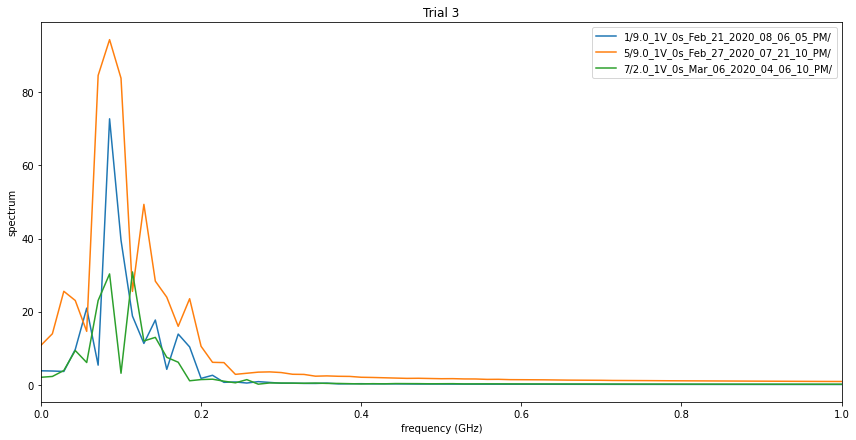

In [7]:
#9.0_0.4V_0s_May_19_2021_02_16_30_PM
rootdir='/Users/amalcolm/Dropbox/CurrentStudents/Somayeh/Runs/Results/Humidity_Runs/Final/'
dirnamelist=[
#'1/9.0_0.1V_0s_Feb_21_2020_01_00_00_PM/',
'1/9.0_1V_0s_Feb_21_2020_08_06_05_PM/',
#'1/9.0_2V_0s_Feb_22_2020_03_12_10_AM/',
#'3/2.0_0.1V_0s_Feb_25_2020_03_00_00_PM/',
#'3/2.0_1V_0s_Feb_25_2020_10_05_20_PM/',
#'3/2.0_2V_0s_Feb_26_2020_05_10_01_AM/',
#'5/9.0_0.1V_0s_Feb_27_2020_12_15_00_PM/',
'5/9.0_1V_0s_Feb_27_2020_07_21_10_PM/',
#'5/9.0_2V_0s_Feb_28_2020_02_29_40_AM/',
#'7/2.0_0.1V_0s_Mar_06_2020_09_00_00_AM/',
'7/2.0_1V_0s_Mar_06_2020_04_06_10_PM/',
#'7/2.0_2V_0s_Mar_06_2020_11_10_59_PM/',
]
printfigs=True
indfigs=False
summaryfig=plt.figure(figsize=[12,6])
for dirname in dirnamelist:
    
    dat=np.genfromtxt(rootdir+dirname+'Delays.txt')
    
    print(dirname)
    print(np.shape(dat))
    tshifts=shifts('tshifts')
    tshifts.raw=dat[:,1]
    tshifts.remove_noise=dat[:,2]
    tshifts.remove_noise_trend=dat[:,3]
    tshifts.remove_noise_wiggles=dat[:,4]
    tshifts.delays=dat[:,0]
    #Rfile=open(dirname+'README','r')
    title=dirname#Rfile.read()
#    title=np.loadtxt(dirname+'README')
 #   print(title)

    dat_al_f=np.fft.fftshift(np.fft.fft(tshifts.remove_noise_trend))

    nt_al=np.size(tshifts.delays)
    dt_al=tshifts.delays[1]-tshifts.delays[0]

    f_al=np.fft.fftshift(np.fft.fftfreq(nt_al,dt_al))


    if indfigs is True:
        plt.figure(figsize=[6,12])
        plt.subplot(311)
        plt.plot(tshifts.delays,tshifts.remove_noise,label='Alison')
        #plt.xlabel('Transmission Delay (us)')
        plt.ylabel('Traveltime Delay (ns)')
        plt.title(title)

        plt.subplot(312)
        plt.plot(tshifts.delays,tshifts.remove_noise_trend,label='Alison')
        #plt.xlabel('Transmission Delay (us)')
        plt.ylabel('Filtered Traveltime Delay (ns)')


        plt.subplot(313)
        plt.plot(f_al,np.abs(dat_al_f))
        plt.xlabel('frequency (GHz)')
        plt.ylabel('spectrum')
        #plt.title(title)
        plt.xlim([0,1])
        if printfigs is True:
            plt.savefig(dirname+'Delays_FFT.png')
        
    plt.figure(summaryfig.number)
    plt.plot(f_al,np.abs(dat_al_f),label=title)#[:-26])
    plt.xlabel('frequency (GHz)')
    plt.ylabel('spectrum')

plt.xlim([0,1])
plt.legend()

plt.tight_layout()
if printfigs is True:
    plt.title('Trial 3')
    plt.savefig('FFT_Trial3.png')

a11/9.0V_1V_0s_Sep_16_2019_04_25_00_PM/
(280, 5)
a14/9.0V_1V_0s_Sep_24_2019_02_00_00_PM/
(280, 5)
a2/9.0V_1V_0s_Aug_05_2019_04_30_00_PM/
(280, 5)
a5/9.0V_1V_0s_Aug_17_2019_11_00_00_AM/
(280, 5)
a8/9.0V_1V_0s_Sep_03_2019_11_30_00_AM/
(280, 5)


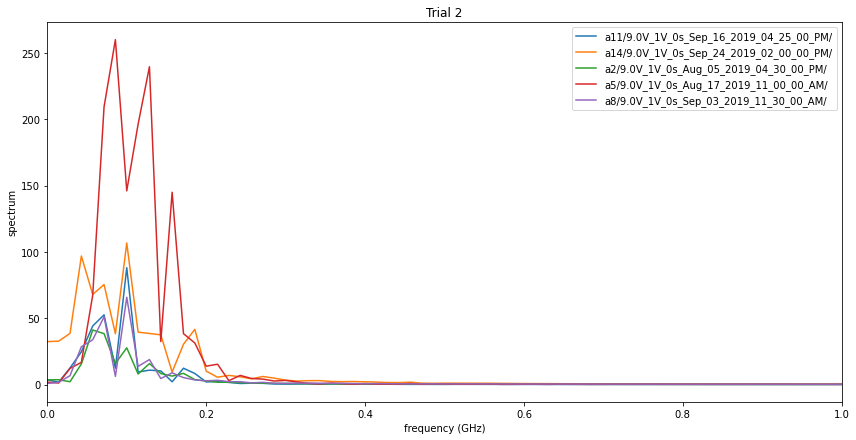

In [9]:
#9.0_0.4V_0s_May_19_2021_02_16_30_PM
rootdir='/Users/amalcolm/Dropbox/CurrentStudents/Somayeh/Runs/Results/Humidity_Runs/Trial2_Final_Low_To_High/'
dirnamelist=[
#'a11/9.0V_0.1V_0s_Sep_16_2019_04_25_00_PM/',
#'a11/9.0V_0.4V_0s_Sep_16_2019_04_25_00_PM/',
'a11/9.0V_1V_0s_Sep_16_2019_04_25_00_PM/',
#'a12/2.0V_0.1V_0s_Sep_18_2019_03_00_00_PM/',
#'a12/2.0V_0.4V_0s_Sep_18_2019_03_00_00_PM/',
#'a12/2.0V_1V_0s_Sep_18_2019_03_00_00_PM/',
#'a14/9.0V_0.1V_0s_Sep_24_2019_02_00_00_PM/',
#'a14/9.0V_0.4V_0s_Sep_24_2019_02_00_00_PM/',
'a14/9.0V_1V_0s_Sep_24_2019_02_00_00_PM/',
#'a15/2.0V_0.1V_0s_Sep_26_2019_03_00_00_PM/',
#'a15/2.0V_0.4V_0s_Sep_26_2019_03_00_00_PM/',
#'a15/2.0V_1V_0s_Sep_26_2019_03_00_00_PM/',
#'a2/9.0V_0.1V_0s_Aug_05_2019_04_30_00_PM/',
#'a2/9.0V_0.4V_0s_Aug_05_2019_04_30_00_PM/',
'a2/9.0V_1V_0s_Aug_05_2019_04_30_00_PM/',
#'a3/2.0V_0.1V_0s_Aug_13_2019_03_00_00_PM/',
#'a3/2.0V_0.4V_0s_Aug_13_2019_03_00_00_PM/',
#'a3/2.0V_1V_0s_Aug_13_2019_03_00_00_PM/',
#'a5/9.0V_0.1V_0s_Aug_17_2019_11_00_00_AM/',
#'a5/9.0V_0.4V_0s_Aug_17_2019_11_00_00_AM/',
'a5/9.0V_1V_0s_Aug_17_2019_11_00_00_AM/',
#'a6/2.0V_0.1V_0s_Aug_19_2019_02_30_00_PM/',
#'a6/2.0V_0.4V_0s_Aug_19_2019_02_30_00_PM/',
#'a6/2.0V_1V_0s_Aug_19_2019_02_30_00_PM/',
#'a8/9.0V_0.1V_0s_Sep_03_2019_11_30_00_AM/',
#'a8/9.0V_0.4V_0s_Sep_03_2019_11_30_00_AM/',
'a8/9.0V_1V_0s_Sep_03_2019_11_30_00_AM/',
#'a9/2.0V_0.1V_0s_Sep_05_2019_04_00_00_PM/',
#'a9/2.0V_0.4V_0s_Sep_05_2019_04_00_00_PM/',
#'a9/2.0V_1V_0s_Sep_05_2019_04_00_00_PM/',
#'test/test2_9.0V_2V_0s_Aug_29_2019_10_00_00_AM/',
#'test/test3_Step2_9.0V_0.4V_0s_Aug_30_2019_12_00_00_PM/'
]
printfigs=True
indfigs=False
summaryfig=plt.figure(figsize=[12,6])
for dirname in dirnamelist:
    
    dat=np.genfromtxt(rootdir+dirname+'Delays.txt')
    
    print(dirname)
    print(np.shape(dat))
    tshifts=shifts('tshifts')
    tshifts.raw=dat[:,1]
    tshifts.remove_noise=dat[:,2]
    tshifts.remove_noise_trend=dat[:,3]
    tshifts.remove_noise_wiggles=dat[:,4]
    tshifts.delays=dat[:,0]
    #Rfile=open(dirname+'README','r')
    title=dirname#Rfile.read()
#    title=np.loadtxt(dirname+'README')
 #   print(title)

    dat_al_f=np.fft.fftshift(np.fft.fft(tshifts.remove_noise_trend))

    nt_al=np.size(tshifts.delays)
    dt_al=tshifts.delays[1]-tshifts.delays[0]

    f_al=np.fft.fftshift(np.fft.fftfreq(nt_al,dt_al))


    if indfigs is True:
        plt.figure(figsize=[6,12])
        plt.subplot(311)
        plt.plot(tshifts.delays,tshifts.remove_noise,label='Alison')
        #plt.xlabel('Transmission Delay (us)')
        plt.ylabel('Traveltime Delay (ns)')
        plt.title(title)

        plt.subplot(312)
        plt.plot(tshifts.delays,tshifts.remove_noise_trend,label='Alison')
        #plt.xlabel('Transmission Delay (us)')
        plt.ylabel('Filtered Traveltime Delay (ns)')


        plt.subplot(313)
        plt.plot(f_al,np.abs(dat_al_f))
        plt.xlabel('frequency (GHz)')
        plt.ylabel('spectrum')
        #plt.title(title)
        plt.xlim([0,1])
        if printfigs is True:
            plt.savefig(dirname+'Delays_FFT.png')
        
    plt.figure(summaryfig.number)
    plt.plot(f_al,np.abs(dat_al_f),label=title)#[:-26])
    plt.xlabel('frequency (GHz)')
    plt.ylabel('spectrum')

plt.xlim([0,1])
plt.legend()

plt.tight_layout()
if printfigs is True:
    plt.title('Trial 2')
    plt.savefig('FFT_Trial2.png')

a11/9.0V_1V_0s_Sep_16_2019_04_25_00_PM/
(280, 5)
a14/9.0V_1V_0s_Sep_24_2019_02_00_00_PM/
(280, 5)
a2/9.0V_1V_0s_Aug_05_2019_04_30_00_PM/
(280, 5)
a5/9.0V_1V_0s_Aug_17_2019_11_00_00_AM/
(280, 5)
a8/9.0V_1V_0s_Sep_03_2019_11_30_00_AM/
(280, 5)


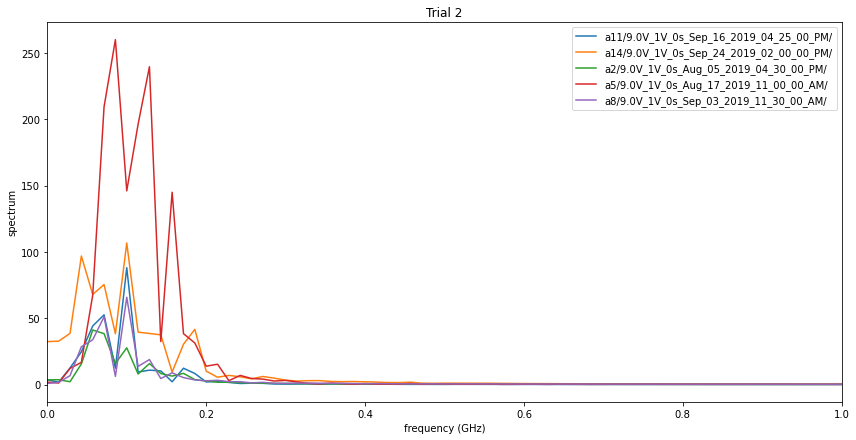

In [9]:
#9.0_0.4V_0s_May_19_2021_02_16_30_PM
rootdir='/Users/amalcolm/Dropbox/CurrentStudents/Somayeh/Runs/Results/Humidity_main/Trial1_Humidity_Runs_Humidity_Decreasing/'
dirnamelist=[
#'a11/9.0V_0.1V_0s_Sep_16_2019_04_25_00_PM/',
#'a11/9.0V_0.4V_0s_Sep_16_2019_04_25_00_PM/',
'a11/9.0V_1V_0s_Sep_16_2019_04_25_00_PM/',
#'a12/2.0V_0.1V_0s_Sep_18_2019_03_00_00_PM/',
#'a12/2.0V_0.4V_0s_Sep_18_2019_03_00_00_PM/',
#'a12/2.0V_1V_0s_Sep_18_2019_03_00_00_PM/',
#'a14/9.0V_0.1V_0s_Sep_24_2019_02_00_00_PM/',
#'a14/9.0V_0.4V_0s_Sep_24_2019_02_00_00_PM/',
'a14/9.0V_1V_0s_Sep_24_2019_02_00_00_PM/',
#'a15/2.0V_0.1V_0s_Sep_26_2019_03_00_00_PM/',
#'a15/2.0V_0.4V_0s_Sep_26_2019_03_00_00_PM/',
#'a15/2.0V_1V_0s_Sep_26_2019_03_00_00_PM/',
#'a2/9.0V_0.1V_0s_Aug_05_2019_04_30_00_PM/',
#'a2/9.0V_0.4V_0s_Aug_05_2019_04_30_00_PM/',
'a2/9.0V_1V_0s_Aug_05_2019_04_30_00_PM/',
#'a3/2.0V_0.1V_0s_Aug_13_2019_03_00_00_PM/',
#'a3/2.0V_0.4V_0s_Aug_13_2019_03_00_00_PM/',
#'a3/2.0V_1V_0s_Aug_13_2019_03_00_00_PM/',
#'a5/9.0V_0.1V_0s_Aug_17_2019_11_00_00_AM/',
#'a5/9.0V_0.4V_0s_Aug_17_2019_11_00_00_AM/',
'a5/9.0V_1V_0s_Aug_17_2019_11_00_00_AM/',
#'a6/2.0V_0.1V_0s_Aug_19_2019_02_30_00_PM/',
#'a6/2.0V_0.4V_0s_Aug_19_2019_02_30_00_PM/',
#'a6/2.0V_1V_0s_Aug_19_2019_02_30_00_PM/',
#'a8/9.0V_0.1V_0s_Sep_03_2019_11_30_00_AM/',
#'a8/9.0V_0.4V_0s_Sep_03_2019_11_30_00_AM/',
'a8/9.0V_1V_0s_Sep_03_2019_11_30_00_AM/',
#'a9/2.0V_0.1V_0s_Sep_05_2019_04_00_00_PM/',
#'a9/2.0V_0.4V_0s_Sep_05_2019_04_00_00_PM/',
#'a9/2.0V_1V_0s_Sep_05_2019_04_00_00_PM/',
#'test/test2_9.0V_2V_0s_Aug_29_2019_10_00_00_AM/',
#'test/test3_Step2_9.0V_0.4V_0s_Aug_30_2019_12_00_00_PM/'
]
printfigs=True
indfigs=False
summaryfig=plt.figure(figsize=[12,6])
for dirname in dirnamelist:
    
    dat=np.genfromtxt(rootdir+dirname+'Delays.txt')
    
    print(dirname)
    print(np.shape(dat))
    tshifts=shifts('tshifts')
    tshifts.raw=dat[:,1]
    tshifts.remove_noise=dat[:,2]
    tshifts.remove_noise_trend=dat[:,3]
    tshifts.remove_noise_wiggles=dat[:,4]
    tshifts.delays=dat[:,0]
    #Rfile=open(dirname+'README','r')
    title=dirname#Rfile.read()
#    title=np.loadtxt(dirname+'README')
 #   print(title)

    dat_al_f=np.fft.fftshift(np.fft.fft(tshifts.remove_noise_trend))

    nt_al=np.size(tshifts.delays)
    dt_al=tshifts.delays[1]-tshifts.delays[0]

    f_al=np.fft.fftshift(np.fft.fftfreq(nt_al,dt_al))


    if indfigs is True:
        plt.figure(figsize=[6,12])
        plt.subplot(311)
        plt.plot(tshifts.delays,tshifts.remove_noise,label='Alison')
        #plt.xlabel('Transmission Delay (us)')
        plt.ylabel('Traveltime Delay (ns)')
        plt.title(title)

        plt.subplot(312)
        plt.plot(tshifts.delays,tshifts.remove_noise_trend,label='Alison')
        #plt.xlabel('Transmission Delay (us)')
        plt.ylabel('Filtered Traveltime Delay (ns)')


        plt.subplot(313)
        plt.plot(f_al,np.abs(dat_al_f))
        plt.xlabel('frequency (GHz)')
        plt.ylabel('spectrum')
        #plt.title(title)
        plt.xlim([0,1])
        if printfigs is True:
            plt.savefig(dirname+'Delays_FFT.png')
        
    plt.figure(summaryfig.number)
    plt.plot(f_al,np.abs(dat_al_f),label=title)#[:-26])
    plt.xlabel('frequency (GHz)')
    plt.ylabel('spectrum')

plt.xlim([0,1])
plt.legend()

plt.tight_layout()
if printfigs is True:
    plt.title('Trial 2')
    plt.savefig('FFT_Trial2.png')

Similar to the cells about but now for when I was turning the scope on and off to see if it was a scope-resetting problem

1.0
1.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

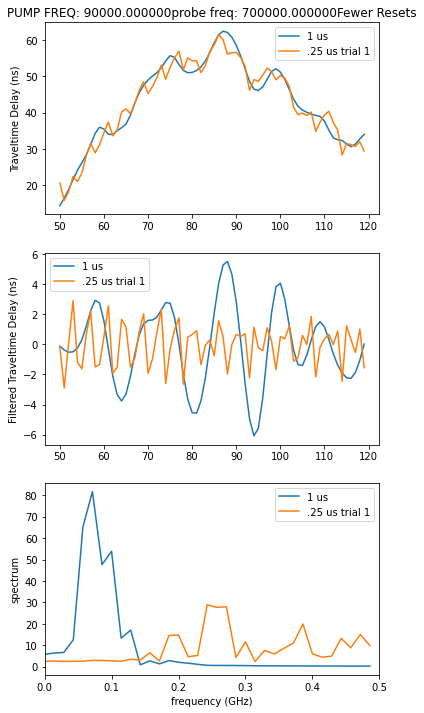

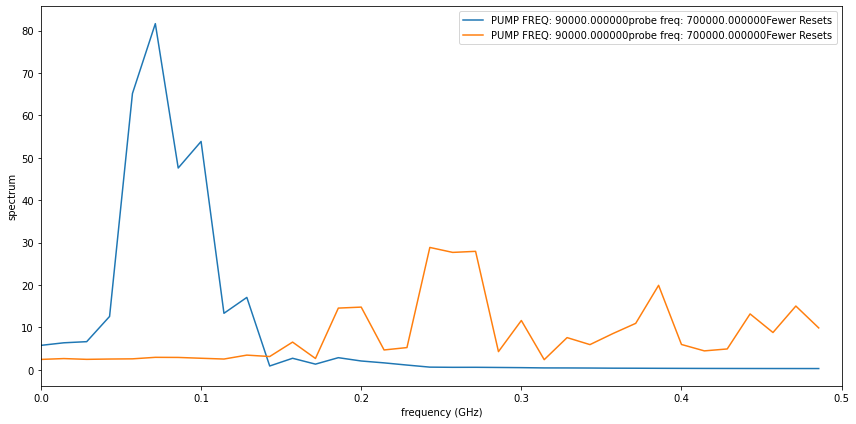

In [102]:
#9.0_0.4V_0s_May_19_2021_02_16_30_PM
dirnamelist=[
            '9.0_10.0V_0s_Jun_17_2021_11_42_49_AM/', #turned off oscilloscope resets, 1 us
            '9.0_10.0V_0s_Jun_17_2021_02_14_51_PM/' # turned off oscilloscope resets, .25 us

#            '9.0_10.0V_0s_Jun_15_2021_04_29_51_PM/',  #1 us sapling, waiting 10 min between points
#            '9.0_10.0V_0s_Jun_15_2021_09_00_00_PM/'  #.25 us sampline, waiting 10 min between points
#            '9.0_0.4V_0s_May_22_2021_02_31_57_AM/',
#            '9.0_0.4V_0s_May_22_2021_04_24_40_AM/',
           # '9.0_10.0V_0s_Jun_09_2021_03_29_30_PM/', #  us sampling
           # '9.0_10.0V_0s_Jun_09_2021_11_00_07_AM/', # .25 us sampling trial 1
           # '9.0_10.0V_0s_Jun_09_2021_05_22_39_PM/' # .25 us sampling trial 2


   #          '/Users/amalcolm/Dropbox/PDF_Results/SKT2_PDF/9.0_0.4V_0s_Apr_22_2021_09_00_15_AM/'
            ]
printfigs=True
indfigs=True
summaryfig=plt.figure(figsize=[12,6])
delayfigs=plt.figure(figsize=[6,12])

labelList=['1 us','.25 us trial 1', '.25 us trial 2']

ii=0
for dirname in dirnamelist:
    label=labelList[ii]
    ii=ii+1
    #print(label)
    if dirname[0] == '/':
        dat=np.genfromtxt(dirname+'Delays_Alison.txt')
    else:
        dat=np.genfromtxt(dirname+'Delays.txt')
    
    #print(dirname)
    #print(np.shape(dat))
    tshifts=shifts('tshifts')
    tshifts.raw=dat[:,1]
    tshifts.remove_noise=dat[:,2]
    tshifts.remove_noise_trend=dat[:,3]
    tshifts.remove_noise_wiggles=dat[:,4]
    tshifts.delays=dat[:,0]
    Rfile=open(dirname+'README','r')
    title=Rfile.read()
#    title=np.loadtxt(dirname+'README')
 #   print(title)
    if label[0] is '.':
        dat_al_f=np.fft.fftshift(np.fft.fft(tshifts.remove_noise_trend[::4]))
        dt_al=(tshifts.delays[1]-tshifts.delays[0])*4
    else:
        dat_al_f=np.fft.fftshift(np.fft.fft(tshifts.remove_noise_trend))
        dt_al=tshifts.delays[1]-tshifts.delays[0]

    print(dt_al)



    nt_al=np.size(dat_al_f)
    
    f_al=np.fft.fftshift(np.fft.fftfreq(nt_al,dt_al))


    if indfigs is True:
        plt.figure(delayfigs.number)
        plt.subplot(311)
        if label[0] is '.':
            plt.plot(tshifts.delays[::4],tshifts.remove_noise[::4],label=label)
        else:
            plt.plot(tshifts.delays,tshifts.remove_noise,label=label)
        #plt.xlabel('Transmission Delay (us)')
        plt.ylabel('Traveltime Delay (ns)')
        plt.title(title)
        plt.legend()

        plt.subplot(312)
        if label[0] is '.':
            plt.plot(tshifts.delays[::4],tshifts.remove_noise_trend[::4],label=label)
        else:
            plt.plot(tshifts.delays,tshifts.remove_noise_trend,label=label)

        #plt.xlabel('Transmission Delay (us)')
        plt.ylabel('Filtered Traveltime Delay (ns)')
        plt.legend()



        plt.subplot(313)
        plt.plot(f_al,np.abs(dat_al_f),label=label)
        plt.xlabel('frequency (GHz)')
        plt.ylabel('spectrum')
        plt.legend()


        #plt.title(title)
        plt.xlim([0,.5])
        if printfigs is True:
            plt.savefig(dirname+'Delays_FFT.png')
        
    plt.figure(summaryfig.number)
    plt.plot(f_al,np.abs(dat_al_f),label=title)#[:-26])
    plt.xlabel('frequency (GHz)')
    plt.ylabel('spectrum')

plt.xlim([0,.5])
plt.legend()

plt.tight_layout()
if printfigs is True:
    plt.savefig('FFT_CompSamp.png')

This is the same as the above, but it's the specific dataset with whcih I figured out what the problem actually is

1.0
0.25


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

0.25


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

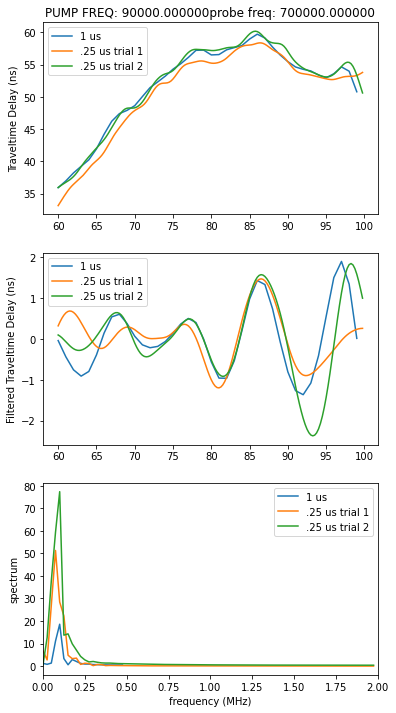

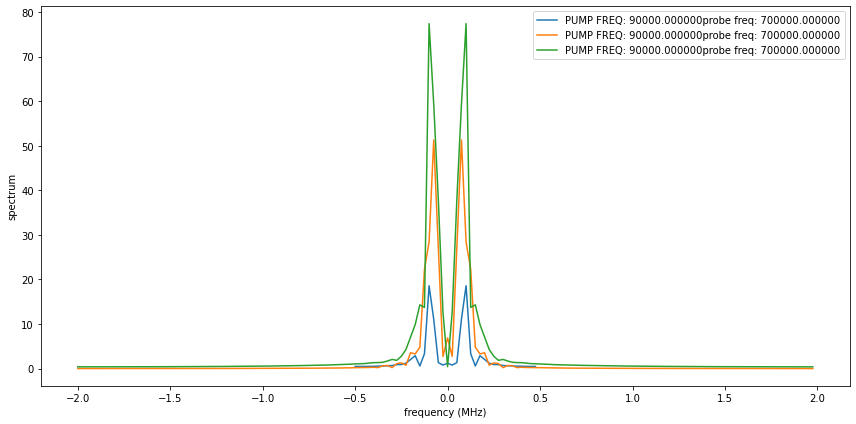

In [40]:
#9.0_0.4V_0s_May_19_2021_02_16_30_PM
dirnamelist=[ #'9.0_0.4V_0s_May_22_2021_02_31_57_AM/',
            #'9.0_0.4V_0s_May_22_2021_04_24_40_AM/',
          
            '9.0_10.0V_0s_Jun_09_2021_03_29_30_PM/', #  us sampling
            '9.0_10.0V_0s_Jun_09_2021_11_00_07_AM/', # .25 us sampling trial 1
            '9.0_10.0V_0s_Jun_09_2021_05_22_39_PM/' # .25 us sampling trial 2
            ]
printfigs=True
indfigs=True
summaryfig=plt.figure(figsize=[12,6])
delayfigs=plt.figure(figsize=[6,12])

labelList=['1 us','.25 us trial 1', '.25 us trial 2']

ii=0
for dirname in dirnamelist:
    label=labelList[ii]
    ii=ii+1
    #print(label)
    if dirname[0] == '/':
        dat=np.genfromtxt(dirname+'Delays_Alison.txt')
    else:
        dat=np.genfromtxt(dirname+'Delays.txt')
    
    #print(dirname)
    #print(np.shape(dat))
    tshifts=shifts('tshifts')
    tshifts.raw=dat[:,1]
    tshifts.remove_noise=dat[:,2]
    tshifts.remove_noise_trend=dat[:,3]
    tshifts.remove_noise_wiggles=dat[:,4]
    tshifts.delays=dat[:,0]
    Rfile=open(dirname+'README','r')
    title=Rfile.read()
#    title=np.loadtxt(dirname+'README')
 #   print(title)
    #if label[0] is '.':
    #    dat_al_f=np.fft.fftshift(np.fft.fft(tshifts.remove_noise_trend[::4]))
    #    dt_al=(tshifts.delays[1]-tshifts.delays[0])*4
    #else:
    dat_al_f=np.fft.fftshift(np.fft.fft(tshifts.remove_noise_trend))
    dt_al=tshifts.delays[1]-tshifts.delays[0]

    print(dt_al)



    nt_al=np.size(dat_al_f)
    
    f_al=np.fft.fftshift(np.fft.fftfreq(nt_al,dt_al))


    if indfigs is True:
        plt.figure(delayfigs.number)
        plt.subplot(311)
        #if label[0] is '.':
        #    plt.plot(tshifts.delays[::4],tshifts.remove_noise[::4],label=label)
        #else:
        plt.plot(tshifts.delays,tshifts.remove_noise,label=label)
        #plt.xlabel('Transmission Delay (us)')
        plt.ylabel('Traveltime Delay (ns)')
        plt.title(title)
        plt.legend()

        plt.subplot(312)
       # if label[0] is '.':
       #     plt.plot(tshifts.delays[::4],tshifts.remove_noise_trend[::4],label=label)
       # else:
        plt.plot(tshifts.delays,tshifts.remove_noise_trend,label=label)

        #plt.xlabel('Transmission Delay (us)')
        plt.ylabel('Filtered Traveltime Delay (ns)')
        plt.legend()



        plt.subplot(313)
        plt.plot(f_al,np.abs(dat_al_f),label=label)
        plt.xlabel('frequency (MHz)')
        plt.ylabel('spectrum')
        plt.legend()


        #plt.title(title)
        plt.xlim([0,2])
        if printfigs is True:
            plt.savefig(dirname+'Delays_FFT.png')
        
    plt.figure(summaryfig.number)
    plt.plot(f_al,np.abs(dat_al_f),label=title)#[:-26])
    plt.xlabel('frequency (MHz)')
    plt.ylabel('spectrum')

#plt.xlim([0,.5])
plt.legend()

plt.tight_layout()
if printfigs is True:
    plt.savefig('FFT_CompSamp.png')

1.0
1.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

1.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

1.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

0.25


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

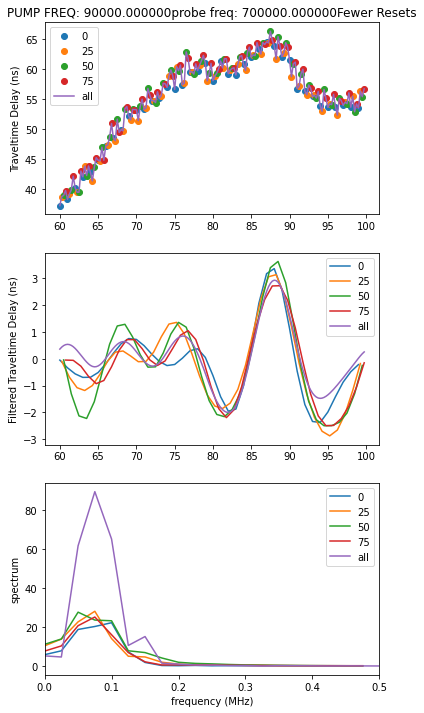

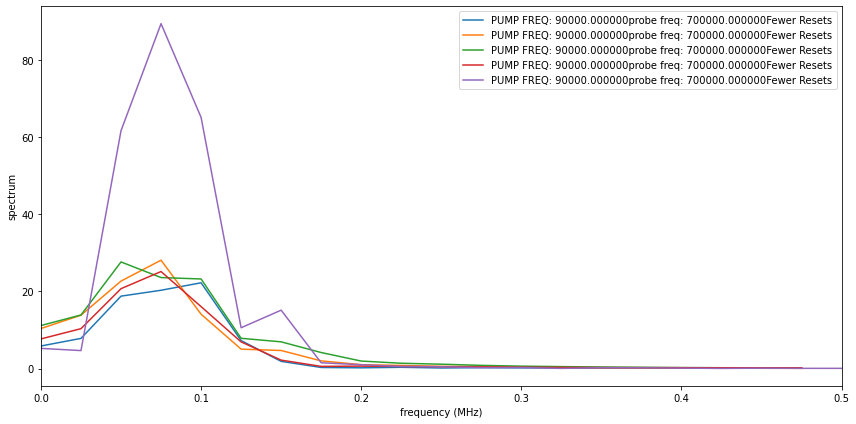

In [33]:
#9.0_0.4V_0s_May_19_2021_02_16_30_PM
dirnamelist=[ '9.0_10.0V_0s_Jun_23_2021_10_12_57_AM/',  # 60.0, 61.0 ...
            '9.0_10.0V_0s_Jun_23_2021_12_05_35_PM/', #60.25, 61.25 ...
             '9.0_10.0V_0s_Jun_23_2021_01_58_32_PM/', #60.5 etc
             '9.0_10.0V_0s_Jun_23_2021_03_51_06_PM/',#60.75 etc
             'Combine_4Runs/'
            ]
printfigs=True
indfigs=True
summaryfig=plt.figure(figsize=[12,6])
delayfigs=plt.figure(figsize=[6,12])

labelList=['0','25','50','75','all']

ii=0
for dirname in dirnamelist:
    label=labelList[ii]
    ii=ii+1
    #print(label)
    if dirname[0] == '/':
        dat=np.genfromtxt(dirname+'Delays_Alison.txt')
    else:
        dat=np.genfromtxt(dirname+'Delays.txt')
    
    #print(dirname)
    #print(np.shape(dat))
    tshifts=shifts('tshifts')
    tshifts.raw=dat[:,1]
    tshifts.remove_noise=dat[:,2]
    tshifts.remove_noise_trend=dat[:,3]
    tshifts.remove_noise_wiggles=dat[:,4]
    tshifts.delays=dat[:,0]
    Rfile=open(dirname+'README','r')
    title=Rfile.read()
#    title=np.loadtxt(dirname+'README')
 #   print(title)
    if label[0] is '.':
        dat_al_f=np.fft.fftshift(np.fft.fft(tshifts.remove_noise_trend[::4]))
        dt_al=(tshifts.delays[1]-tshifts.delays[0])*4
    else:
        dat_al_f=np.fft.fftshift(np.fft.fft(tshifts.remove_noise_trend))
        dt_al=tshifts.delays[1]-tshifts.delays[0]

    print(dt_al)



    nt_al=np.size(dat_al_f)
    
    f_al=np.fft.fftshift(np.fft.fftfreq(nt_al,dt_al))


    if indfigs is True:
        plt.figure(delayfigs.number)
        plt.subplot(311)
        if label[0] is 'a':
            plt.plot(tshifts.delays,tshifts.raw,label=label)
        else:
            plt.plot(tshifts.delays,tshifts.raw,'o',label=label)
        #plt.xlabel('Transmission Delay (us)')
        plt.ylabel('Traveltime Delay (ns)')
        plt.title(title)
        plt.legend()
        #plt.xlim([60,65])
        plt.subplot(312)
        if label[0] is '.':
            plt.plot(tshifts.delays[::4],tshifts.remove_noise_trend[::4],label=label)
        else:
            plt.plot(tshifts.delays,tshifts.remove_noise_trend,label=label)

        #plt.xlabel('Transmission Delay (us)')
        plt.ylabel('Filtered Traveltime Delay (ns)')
        plt.legend()



        plt.subplot(313)
        plt.plot(f_al,np.abs(dat_al_f),label=label)
        plt.xlabel('frequency (MHz)')
        plt.ylabel('spectrum')
        plt.legend()


        #plt.title(title)
        plt.xlim([0,.5])
        if printfigs is True:
            plt.savefig(dirname+'Delays_FFT.png')
        
    plt.figure(summaryfig.number)
    plt.plot(f_al,np.abs(dat_al_f),label=title)#[:-26])
    plt.xlabel('frequency (MHz)')
    plt.ylabel('spectrum')

plt.xlim([0,.5])
plt.legend()

plt.tight_layout()
if printfigs is True:
    plt.savefig('FFT_CompSamp.png')

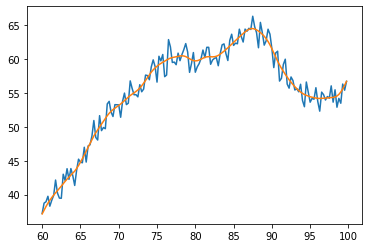

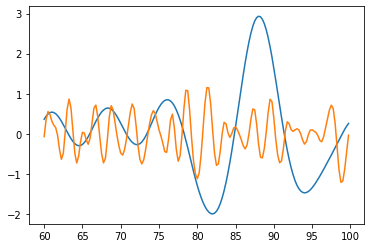

In [31]:
dat=np.loadtxt('Combine_4Runs/Delays.txt')
delays=dat[:,0]
shifts_raw=dat[:,1]
shifts_remove_noise=dat[:,2]
shifts_remove_noise_trend=dat[:,3]
fs=1.0/.25*1e6
#fs=1.0e6

shifts_filt1=butter_lowpass_filter(shifts_raw,250.e3,fs,2)
shifts_filt2=butter_bandpass_filter(tshifts.raw,50.e3,150.e3,fs,2)
plt.plot(delays, shifts_raw,delays,shifts_filt1)
plt.figure()
plt.plot(delays,shifts_filt2,delays,shifts_remove_noise_trend)
#tshifts.remove_noise=butter_lowpass_filter(tshifts.raw,250.e3,fs,2)
#tshifts.remove_noise_trend=butter_bandpass_filter(tshifts.raw,50.e3,150.e3,fs,2)


This cell looks at the differences in the probes for different datasets

[-1.41414153e-06 -3.53531865e-06 -5.65649578e-06 ...  3.43426429e-05
  2.33530081e-05  1.16765041e-05]


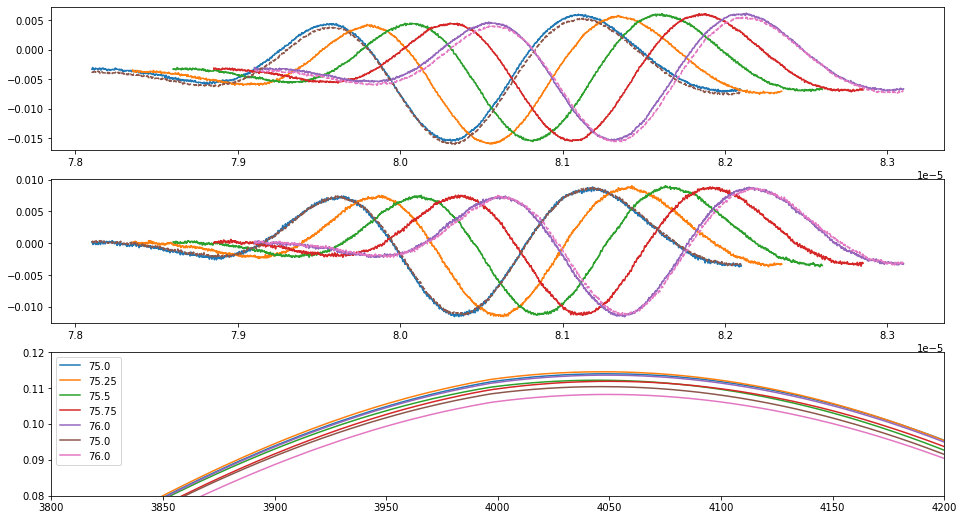

In [84]:
#9.0_0.4V_0s_May_19_2021_02_16_30_PM
dir2='9.0_10.0V_0s_Jun_15_2021_04_29_51_PM/' 
dir1='9.0_10.0V_0s_Jun_15_2021_09_00_00_PM/' 
prlist1=['75.0','75.25','75.5','75.75','76.0']
prlist2=['75.0','76.0']


plt.figure(figsize=[16,9])
plt.subplot(311)
for pr in prlist1:
    probedat=timedata('probedat')
    readlabdat(dir1+'pr'+str(pr)+'.csv',probedat)
    plt.plot(probedat.time,probedat.data,label=str(pr))
for pr in prlist2:
    probedat=timedata('probedat')
    readlabdat(dir2+'pr'+str(pr)+'.csv',probedat)
    plt.plot(probedat.time,probedat.data,'--',label='coarse '+str(pr))
#plt.xlim([7.8e-5,8.3e-5])

plt.subplot(312)
for pr in prlist1:
#    print(pr)
    probedat1=timedata('probedat')
    readlabdat(dir1+'pu'+str(pr)+'.csv',probedat1)
    probedat2=timedata('probedat2')
    readlabdat(dir1+'pp'+str(pr)+'.csv',probedat2)
    diffdat=probedat2.data-probedat1.data
    plt.plot(probedat2.time,diffdat,label=str(pr))
for pr in prlist2:
    probedat1=timedata('probedat')
    readlabdat(dir2+'pu'+str(pr)+'.csv',probedat1)
    probedat2=timedata('probedat2')
    readlabdat(dir2+'pp'+str(pr)+'.csv',probedat2)
    diffdat=probedat2.data-probedat1.data
    plt.plot(probedat2.time,diffdat,'--',label=str(pr))
#plt.xlim([7.8e-5,8.3e-5])

plt.subplot(313)
for pr in prlist1:
    probedat=timedata('probedat')
    readlabdat(dir1+'pr'+str(pr)+'.csv',probedat)
    probedat1=timedata('probedat')
    readlabdat(dir1+'pu'+str(pr)+'.csv',probedat1)
    probedat2=timedata('probedat2')
    readlabdat(dir1+'pp'+str(pr)+'.csv',probedat2)
    diffdat=probedat2.data-probedat1.data
    corrdat=np.correlate(diffdat,probedat.data,'full')
    plt.plot(corrdat,label=str(pr))
for pr in prlist2:
    probedat=timedata('probedat')
    readlabdat(dir2+'pr'+str(pr)+'.csv',probedat)
    probedat1=timedata('probedat')
    readlabdat(dir2+'pu'+str(pr)+'.csv',probedat1)
    probedat2=timedata('probedat2')
    readlabdat(dir2+'pp'+str(pr)+'.csv',probedat2)
    diffdat=probedat2.data-probedat1.data
    corrdat=np.correlate(diffdat,probedat.data,'full')
    plt.plot(corrdat,label=str(pr))
#plt.xlim([7.8e-5,8.3e-5])

plt.xlim([3800,4200])
plt.ylim([.08,.12])
print(corrdat)
plt.legend()
#plt.plot()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

0.000703549999999999
0.0008040700000000005
0.0009045300000000006
0.0011055300000000004


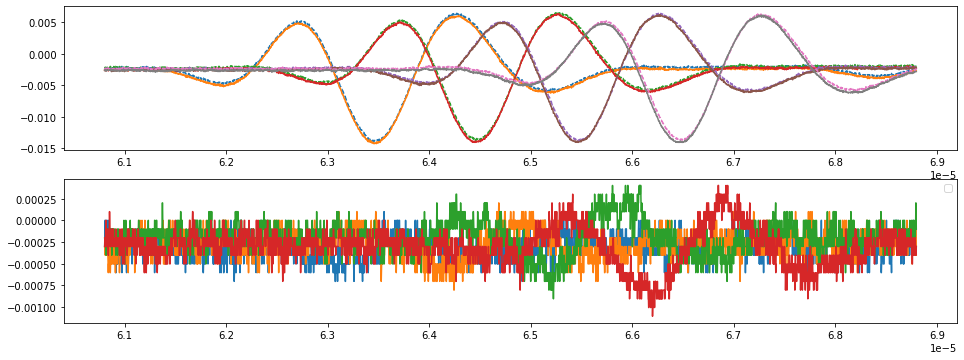

In [122]:
#9.0_0.4V_0s_May_19_2021_02_16_30_PM
#dir2='9.0_10.0V_0s_Jun_16_2021_04_11_51_PM/'  #.25 us sampling, with resettin 
#dir1='9.0_10.0V_0s_Jun_17_2021_08_34_51_AM/' #.25 us sampling, without resetting
#dir2='9.0_10.0V_0s_Jun_17_2021_11_00_09_AM/'  #1 us sampling, with resetting
dir1='9.0_10.0V_0s_Jun_17_2021_11_08_29_AM/' #.25 us sampling, without resetting
#dir2='9.0_10.0V_0s_Jun_17_2021_11_15_38_AM/'  #1 us sampling, with resetting
dir2='9.0_10.0V_0s_Jun_17_2021_11_06_29_AM/' #.25 us sampling, without resetting
#dir2='9.0_10.0V_0s_Jun_17_2021_11_22_36_AM/'  #1 us sampling, with resetting


#prlist1=['58','59','60','61','62']#['75.0']#,'75.25','75.5','75.75','76.0']
prlist2=['58','59','60','61','62']#'75.25','75.5','75.75','76.0']
prlist1=['58.0','59.0','60.0','61.0']#['75.0']#,'75.25','75.5','75.75','76.0']
#prlist2=['58.0','59.0','60.0','61.0']#'75.25','75.5','75.75','76.0']




plt.figure(figsize=[16,9])
plt.subplot(311)
#for pr in prlist1:
#    probedat=timedata('probedat')
#    readlabdat(dir1+'pr'+str(pr)+'.csv',probedat)
#    plt.plot(probedat.time,probedat.data,label=str(pr))
for pr,pr2 in zip(prlist1,prlist2):
    plt.subplot(311)
    probedat=timedata('probedat')
    readlabdat(dir1+'pr'+str(pr)+'.csv',probedat)
    plt.plot(probedat.time,probedat.data,'--',label='reset '+str(pr))
    probedat2=timedata('probedat2')
    readlabdat(dir2+'pr'+str(pr2)+'.csv',probedat2)
    plt.plot(probedat.time,probedat2.data,label='no reset '+str(pr2))
    
    plt.subplot(312)
    plt.plot(probedat.time,probedat2.data-probedat.data)

    print(np.max(np.abs(probedat2.data-probedat.data)))
#plt.xlim([-1e-7,2e-7])

plt.legend()
#plt.plot()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

0.000703549999999999
0.0008040700000000005
0.0009045300000000006
0.0011055300000000004


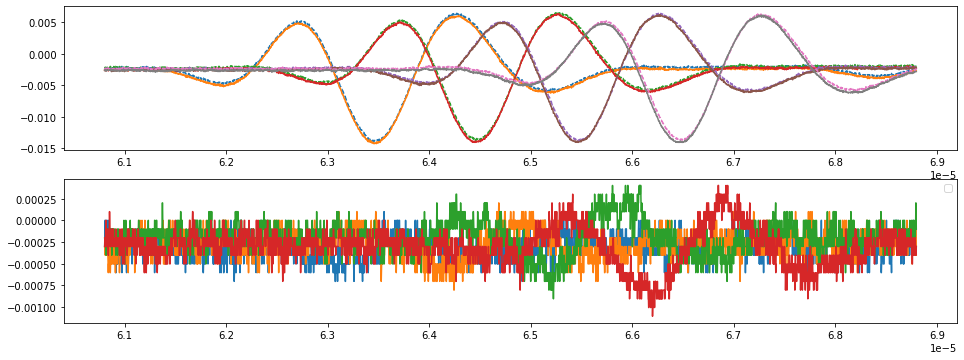

In [122]:
#9.0_0.4V_0s_May_19_2021_02_16_30_PM
#dir2='9.0_10.0V_0s_Jun_16_2021_04_11_51_PM/'  #.25 us sampling, with resettin 
#dir1='9.0_10.0V_0s_Jun_17_2021_08_34_51_AM/' #.25 us sampling, without resetting
#dir2='9.0_10.0V_0s_Jun_17_2021_11_00_09_AM/'  #1 us sampling, with resetting
dir1='9.0_10.0V_0s_Jun_17_2021_11_08_29_AM/' #.25 us sampling, without resetting
#dir2='9.0_10.0V_0s_Jun_17_2021_11_15_38_AM/'  #1 us sampling, with resetting
dir2='9.0_10.0V_0s_Jun_17_2021_11_06_29_AM/' #.25 us sampling, without resetting
#dir2='9.0_10.0V_0s_Jun_17_2021_11_22_36_AM/'  #1 us sampling, with resetting


#prlist1=['58','59','60','61','62']#['75.0']#,'75.25','75.5','75.75','76.0']
prlist2=['58','59','60','61','62']#'75.25','75.5','75.75','76.0']
prlist1=['58.0','59.0','60.0','61.0']#['75.0']#,'75.25','75.5','75.75','76.0']
#prlist2=['58.0','59.0','60.0','61.0']#'75.25','75.5','75.75','76.0']




plt.figure(figsize=[16,9])
plt.subplot(311)
#for pr in prlist1:
#    probedat=timedata('probedat')
#    readlabdat(dir1+'pr'+str(pr)+'.csv',probedat)
#    plt.plot(probedat.time,probedat.data,label=str(pr))
for pr,pr2 in zip(prlist1,prlist2):
    plt.subplot(311)
    probedat=timedata('probedat')
    readlabdat(dir1+'pr'+str(pr)+'.csv',probedat)
    plt.plot(probedat.time,probedat.data,'--',label='reset '+str(pr))
    probedat2=timedata('probedat2')
    readlabdat(dir2+'pr'+str(pr2)+'.csv',probedat2)
    plt.plot(probedat.time,probedat2.data,label='no reset '+str(pr2))
    
    plt.subplot(312)
    plt.plot(probedat.time,probedat2.data-probedat.data)

    print(np.max(np.abs(probedat2.data-probedat.data)))
#plt.xlim([-1e-7,2e-7])

plt.legend()
#plt.plot()

In [60]:
probedat1.data[0]

TypeError: 'builtin_function_or_method' object is not subscriptable

These cells just read in different datasets

In [105]:
dat=np.genfromtxt('9.0_0.4V_0s_May_20_2021_10_59_31_AM/delays.txt')
tshifts=shifts('tshifts')
tshifts.raw=dat[:,1]
tshifts.remove_noise=dat[:,2]
tshifts.remove_noise_trend=dat[:,3]
tshifts.remove_noise_wiggles=dat[:,4]
tshifts.delays=dat[:,0]
 

In [91]:
dat2=np.genfromtxt('/Users/amalcolm/Dropbox/PDF_Results/SKT2_PDF/9.0_0.4V_0s_Apr_22_2021_09_00_15_AM/Delays_Alison.txt')

tshifts_som=shifts('tshifts_som')
tshifts_som.raw=dat2[:,1]
tshifts_som.remove_noise=dat2[:,2]
tshifts_som.remove_noise_trend=dat2[:,3]
tshifts_som.remove_noise_wiggles=dat2[:,4]
tshifts_som.delays=dat2[:,0]




In [92]:
dat3=np.genfromtxt('/Users/amalcolm/Dropbox/PDF_Results/SKT2_PDF/9.0_0.4V_0s_Apr_22_2021_09_00_15_AM/delays.txt')

tshifts_som2=shifts('tshifts_som2')
tshifts_som2.raw=dat3[:,1]
tshifts_som2.remove_noise=dat3[:,2]
tshifts_som2.remove_noise_trend=dat3[:,3]
tshifts_som2.remove_noise_wiggles=dat3[:,4]
tshifts_som2.delays=dat3[:,0]




Text(0, 0.5, 'Traveltime Delay (ns)')

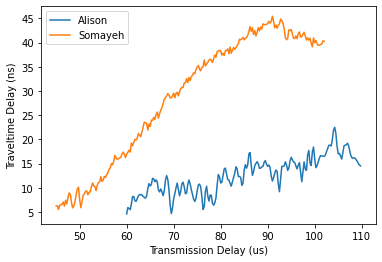

In [106]:
plt.plot(tshifts.delays,tshifts.remove_noise,label='Alison')
plt.plot(tshifts_som.delays,tshifts_som.raw,label='Somayeh')
plt.legend()
plt.xlabel('Transmission Delay (us)')
plt.ylabel('Traveltime Delay (ns)')




Text(0, 0.5, 'Traveltime Delay (ns)')

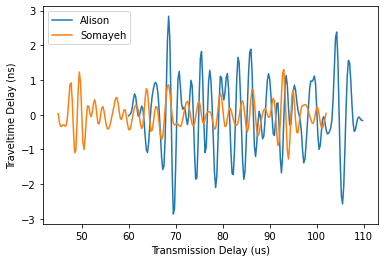

In [107]:
plt.plot(tshifts.delays,tshifts.remove_noise_trend,label='Alison')
plt.plot(tshifts_som.delays,tshifts_som.remove_noise_trend,label='Somayeh')
plt.legend()
plt.xlabel('Transmission Delay (us)')
plt.ylabel('Traveltime Delay (ns)')




(0.0, 1.0)

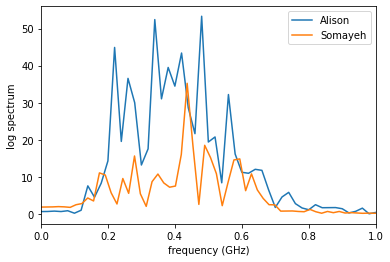

In [108]:
dat_al_f=np.fft.fftshift(np.fft.fft(tshifts.remove_noise_trend))
dat_som_f=np.fft.fftshift(np.fft.fft(tshifts_som.remove_noise_trend))

nt_al=np.size(tshifts.delays)
dt_al=tshifts.delays[1]-tshifts.delays[0]
nt_som=np.size(tshifts_som.delays)
dt_som=tshifts_som.delays[1]-tshifts_som.delays[0]

f_al=np.fft.fftshift(np.fft.fftfreq(nt_al,dt_al))
f_som=np.fft.fftshift(np.fft.fftfreq(nt_som,dt_som))

#plt.semilogy(f_al,np.abs(dat_al_f),label='Alison')
#plt.semilogy(f_som,np.abs(dat_som_f),label='Somayeh')
plt.plot(f_al,np.abs(dat_al_f),label='Alison')
plt.plot(f_som,np.abs(dat_som_f),label='Somayeh')
plt.xlabel('frequency (GHz)')
plt.ylabel('log spectrum')
plt.legend()
plt.xlim([0,1])

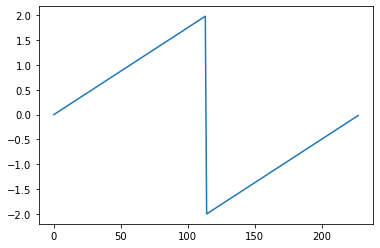

In [69]:
plt.plot(f_som)

In [34]:
GetDelays(['/Users/amalcolm/Dropbox/Nonlinear/Experiments/CODE/LABCodes/Somayeh/9.0_10.0V_0s_Jun_09_2021_11_00_07_AM/'],
          [1.0],winlen=60e-6,savefig=0,pathbase='',compbase='',recompute=1,missing_data=np.array([]),
          delaystep=0.25,delay_scale_fact=1,doslopes=0,plotcolor='O')   #'9.0_10.0V_0s_Jun_09_2021_05_22_39_PM/'


In [35]:
GetDelays(['/Users/amalcolm/Dropbox/Nonlinear/Experiments/CODE/LABCodes/Somayeh/9.0_10.0V_0s_Jun_09_2021_05_22_39_PM/'],
          [1.0],winlen=60e-6,savefig=0,pathbase='',compbase='',recompute=1,missing_data=np.array([]),
          delaystep=0.25,delay_scale_fact=1,doslopes=0,plotcolor='O')   #'9.0_10.0V_0s_Jun_09_2021_05_22_39_PM/'


In [6]:
GetDelays(['/Users/amalcolm/Dropbox/Nonlinear/Experiments/CODE/LABCodes/Somayeh/9.0_10.0V_0s_Jun_23_2021_10_12_57_AM/'],
          [1.0],winlen=60e-6,savefig=0,pathbase='',compbase='',recompute=1,missing_data=np.array([]),
          delaystep=1.0,delay_scale_fact=1,doslopes=0,plotcolor='O')
GetDelays(['/Users/amalcolm/Dropbox/Nonlinear/Experiments/CODE/LABCodes/Somayeh/9.0_10.0V_0s_Jun_23_2021_12_05_35_PM/'],
          [1.0],winlen=60e-6,savefig=0,pathbase='',compbase='',recompute=1,missing_data=np.array([]),
          delaystep=1.0,delay_scale_fact=1,doslopes=0,plotcolor='O')



In [ ]:
                '9.0_10.0V_0s_Jun_09_2021_03_29_30_PM' # .25 us sampling
                '9.0_10.0V_0s_Jun_09_2021_11_00_07_PM' # 1 us sampling
                '9.0_10.0V_0s_Jun_09_2021_05_22_39_PM' # .25 us sampling
  